In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import numpy as np

In [2]:
warnings.filterwarnings('ignore')
sns.set_theme(
    style='white',
    rc={'axes.facecolor':(0,0,0,0)}
)

In [4]:
rs = np.random.RandomState()
ratings = rs.randn(500)
group = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(ratings=ratings, group=group))
m = df.group.map(ord)
df["ratings"] += m
df

ratings group
0    64.559211     A
1    65.557910     B
2    67.462591     C
3    67.305301     D
4    68.588157     E
..         ...   ...
495  68.722780     F
496  70.221509     G
497  71.695632     H
498  71.666938     I
499  72.601989     J

[500 rows x 2 columns]

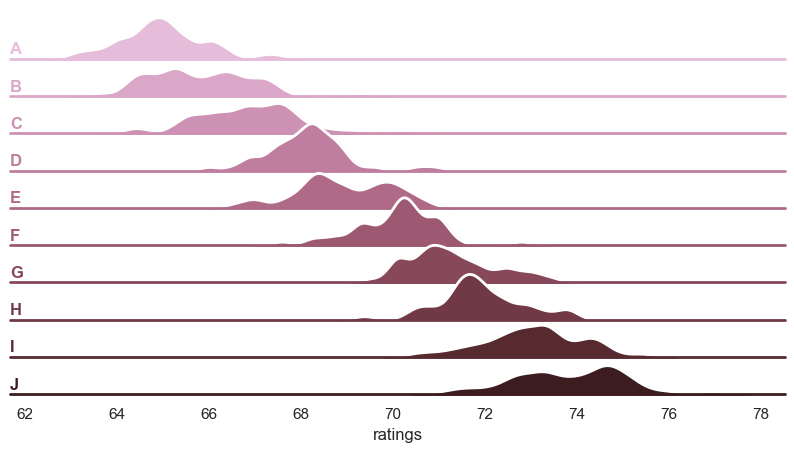

In [5]:
palette = sns.cubehelix_palette(n_colors=10, start=1, rot=-.2, light=.8)
g = sns.FacetGrid(df, row="group", hue="group", aspect=20, height=.5, palette=palette)
g.map(sns.kdeplot, "ratings",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "ratings", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "ratings")
g.figure.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [6]:
sns.set_theme(style='ticks')

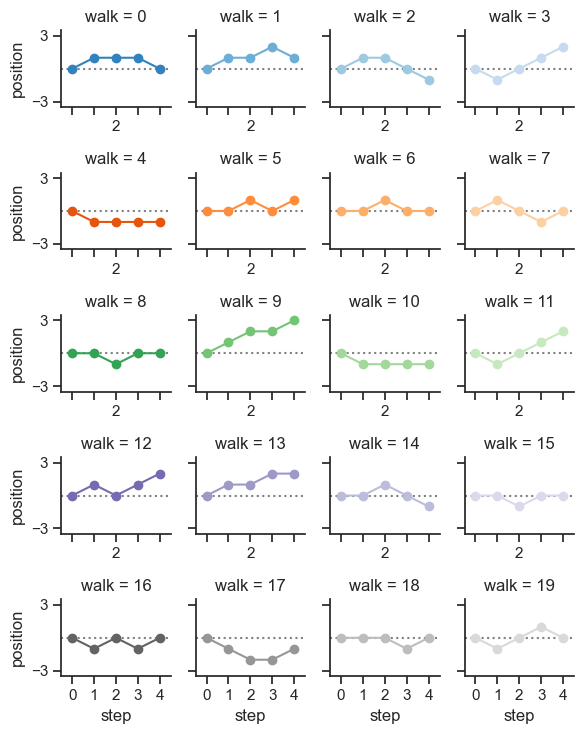

In [7]:
rs=np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)
grid.refline(y=0, linestyle=":")
grid.map(plt.plot, "step", "position", marker="o")
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))
grid.fig.tight_layout(w_pad=1)

In [11]:
r = np.linspace(0, 10, num=100)
df = pd.DataFrame({'r': r, 'slow': r, 'medium': 2 * r, 'fast': 4 * r})
df

r      slow     medium       fast
0    0.00000   0.00000   0.000000   0.000000
1    0.10101   0.10101   0.202020   0.404040
2    0.20202   0.20202   0.404040   0.808081
3    0.30303   0.30303   0.606061   1.212121
4    0.40404   0.40404   0.808081   1.616162
..       ...       ...        ...        ...
95   9.59596   9.59596  19.191919  38.383838
96   9.69697   9.69697  19.393939  38.787879
97   9.79798   9.79798  19.595960  39.191919
98   9.89899   9.89899  19.797980  39.595960
99  10.00000  10.00000  20.000000  40.000000

[100 rows x 4 columns]

In [12]:
df = pd.melt(df, id_vars=['r'], var_name='speed', value_name='theta')
df

r speed      theta
0     0.00000  slow   0.000000
1     0.10101  slow   0.101010
2     0.20202  slow   0.202020
3     0.30303  slow   0.303030
4     0.40404  slow   0.404040
..        ...   ...        ...
295   9.59596  fast  38.383838
296   9.69697  fast  38.787879
297   9.79798  fast  39.191919
298   9.89899  fast  39.595960
299  10.00000  fast  40.000000

[300 rows x 3 columns]

In [13]:
g = sns.FacetGrid(df, col="speed", hue="speed",
                  subplot_kws=dict(projection='polar'), height=4.5,
                  sharex=False, sharey=False, despine=False)
g.map(sns.scatterplot, "theta", "r")